In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("azd.csv")
num_rows = data.shape[0]
data.head()

priceDate itemName         state mandiName  arrivals unitArrivals variety  \
0  2005-04-11   Potato  NCT of Delhi   Azadpur     106.0       Tonnes  F.A.Q.   
1  2005-04-12   Potato  NCT of Delhi   Azadpur    1745.0       Tonnes  F.A.Q.   
2  2005-04-13   Potato  NCT of Delhi   Azadpur    1233.0       Tonnes  F.A.Q.   
3  2005-04-16   Potato  NCT of Delhi   Azadpur    1654.0       Tonnes  F.A.Q.   
4  2005-04-18   Potato  NCT of Delhi   Azadpur      26.0       Tonnes  F.A.Q.   

   minPrice  maxPrice  modalPrice   priceUnit  
0     300.0     663.0       475.0  Rs/Quintal  
1     325.0     688.0       500.0  Rs/Quintal  
2     300.0     688.0       488.0  Rs/Quintal  
3     350.0     650.0       475.0  Rs/Quintal  
4     350.0     650.0       475.0  Rs/Quintal

In [3]:
data.describe()

arrivals     minPrice      maxPrice   modalPrice
count   3778.000000  3804.000000   3804.000000  3795.000000
mean    1169.233086   511.487382   1185.697687   812.674572
std      681.258005   288.991695    706.298731   417.013277
min        0.100000    60.000000    275.000000   198.000000
25%      883.700000   300.000000    700.000000   500.000000
50%     1277.750000   438.000000   1031.000000   700.000000
75%     1569.700000   625.000000   1500.000000   991.000000
max    11984.200000  2100.000000  20580.000000  4060.000000

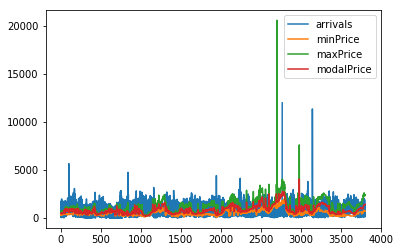

In [4]:
data.plot()
plt.show()

In [5]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

X = pd.read_csv('azd.csv')
X = X.iloc[:, 7]
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [6]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

In [7]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # The dataset has values for approx 292 days a year
    days = 365
    diff = difference(history, days)
    diff = [x for x in diff if str(x) != 'nan']
    # predictions
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, days)
    predictions.append(yhat)
    
    obs = test[i+1902]
    history.append(obs)
    print('%d: Predicted=%.3f, Expected=%3.f' % (i,yhat, obs))

mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

   

0: Predicted=318.697, Expected=375
1: Predicted=215.812, Expected=320
2: Predicted=371.369, Expected=320
3: Predicted=236.976, Expected=320
4: Predicted=268.799, Expected=300
5: Predicted=281.311, Expected=280
6: Predicted=280.973, Expected=320
7: Predicted=296.036, Expected=300
8: Predicted=297.790, Expected=300
9: Predicted=298.664, Expected=300
10: Predicted=299.192, Expected=360
11: Predicted=322.667, Expected=340
12: Predicted=354.714, Expected=340
13: Predicted=512.129, Expected=320
14: Predicted=437.845, Expected=320
15: Predicted=453.229, Expected=360
16: Predicted=341.363, Expected=280
17: Predicted=296.932, Expected=260
18: Predicted=282.182, Expected=260
19: Predicted=273.325, Expected=260
20: Predicted=288.009, Expected=200
21: Predicted=253.661, Expected=200
22: Predicted=232.200, Expected=200
23: Predicted=294.303, Expected=200
24: Predicted=182.289, Expected=200
25: Predicted=201.551, Expected=200
26: Predicted=201.076, Expected=250
27: Predicted=220.126, Expected=200
28

225: Predicted=1042.109, Expected=1000
226: Predicted=1025.931, Expected=1000
227: Predicted=1015.385, Expected=1050
228: Predicted=1028.383, Expected=1000
229: Predicted=1017.920, Expected=1000
230: Predicted=1010.655, Expected=1000
231: Predicted=966.336, Expected=1050
232: Predicted=998.371, Expected=1000
233: Predicted=880.068, Expected=1000
234: Predicted=1046.195, Expected=1000
235: Predicted=1030.013, Expected=1000
236: Predicted=1017.827, Expected=975
237: Predicted=1040.992, Expected=975
238: Predicted=1015.075, Expected=1040
239: Predicted=1023.826, Expected=813
240: Predicted=903.164, Expected=1040
241: Predicted=932.595, Expected=1040
242: Predicted=975.838, Expected=1000
243: Predicted=1026.466, Expected=1040
244: Predicted=991.946, Expected=1040
245: Predicted=1010.556, Expected=875
246: Predicted=1019.224, Expected=813
247: Predicted=878.183, Expected=875
248: Predicted=934.660, Expected=813
249: Predicted=887.647, Expected=813
250: Predicted=857.242, Expected=750
251: P

446: Predicted=625.960, Expected=700
447: Predicted=655.661, Expected=640
448: Predicted=649.652, Expected=660
449: Predicted=653.736, Expected=700
450: Predicted=672.273, Expected=700
451: Predicted=683.531, Expected=700
452: Predicted=690.219, Expected=700
453: Predicted=694.192, Expected=700
454: Predicted=696.551, Expected=700
455: Predicted=697.952, Expected=700
456: Predicted=698.783, Expected=600
457: Predicted=679.288, Expected=600
458: Predicted=647.196, Expected=600
459: Predicted=648.010, Expected=600
460: Predicted=608.586, Expected=700
461: Predicted=645.073, Expected=600
462: Predicted=607.338, Expected=600
463: Predicted=624.238, Expected=700
464: Predicted=654.532, Expected=700
465: Predicted=672.995, Expected=700
466: Predicted=743.963, Expected=680
467: Predicted=758.432, Expected=680
468: Predicted=726.815, Expected=700
469: Predicted=655.850, Expected=700
470: Predicted=673.477, Expected=700
471: Predicted=704.221, Expected=700
472: Predicted=662.596, Expected=700
4

668: Predicted=646.052, Expected=640
669: Predicted=643.563, Expected=640
670: Predicted=642.098, Expected=600
671: Predicted=687.334, Expected=600
672: Predicted=683.256, Expected=600
673: Predicted=649.400, Expected=600
674: Predicted=773.040, Expected=600
675: Predicted=703.554, Expected=600
676: Predicted=485.559, Expected=840
677: Predicted=281.429, Expected=840
678: Predicted=854.906, Expected=700
679: Predicted=864.911, Expected=640
680: Predicted=773.060, Expected=540
681: Predicted=680.171, Expected=560
682: Predicted=633.740, Expected=600
683: Predicted=671.347, Expected=600
684: Predicted=592.505, Expected=600
685: Predicted=596.359, Expected=560
686: Predicted=631.427, Expected=540
687: Predicted=594.456, Expected=520
688: Predicted=564.963, Expected=520
689: Predicted=547.341, Expected=560
690: Predicted=552.999, Expected=500
691: Predicted=481.201, Expected=480
692: Predicted=481.240, Expected=460
693: Predicted=472.578, Expected=480
694: Predicted=475.824, Expected=490
6

882: Predicted=1787.194, Expected=1800
883: Predicted=1653.200, Expected=1800
884: Predicted=1712.538, Expected=1900
885: Predicted=1785.494, Expected=1900
886: Predicted=1827.784, Expected=1625
887: Predicted=1742.119, Expected=1875
888: Predicted=1900.758, Expected=2000
889: Predicted=1938.246, Expected=2000
890: Predicted=1960.997, Expected=1900
891: Predicted=1934.676, Expected=1900
892: Predicted=1821.920, Expected=1900
893: Predicted=1779.490, Expected=1800
894: Predicted=1786.059, Expected=1500
895: Predicted=1669.339, Expected=1800
896: Predicted=1728.837, Expected=1800
897: Predicted=1754.994, Expected=1800
898: Predicted=1771.484, Expected=2100
899: Predicted=1928.673, Expected=2000
900: Predicted=1900.131, Expected=1700
901: Predicted=1841.323, Expected=1650
902: Predicted=1703.214, Expected=1650
903: Predicted=1686.942, Expected=1500
904: Predicted=1572.195, Expected=1500
905: Predicted=1587.681, Expected=1500
906: Predicted=1553.813, Expected=1500
907: Predicted=1254.099, 

/home/vishal/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1079: Predicted=708.938, Expected=438
1080: Predicted=600.645, Expected=400
1081: Predicted=582.770, Expected=400
1082: Predicted=510.640, Expected=360
1083: Predicted=451.367, Expected=400
1084: Predicted=433.756, Expected=400
1085: Predicted=420.875, Expected=400
1086: Predicted=372.921, Expected=400
1087: Predicted=385.180, Expected=400
1088: Predicted=390.810, Expected=400
1089: Predicted=454.299, Expected=400
1090: Predicted=430.742, Expected=350
1091: Predicted=397.627, Expected=350
1092: Predicted=419.534, Expected=400
1093: Predicted=412.603, Expected=300
1094: Predicted=364.886, Expected=300
1095: Predicted=340.174, Expected=300
1096: Predicted=324.860, Expected=300
1097: Predicted=475.381, Expected=300
1098: Predicted=400.741, Expected=280
1099: Predicted=353.534, Expected=300
1100: Predicted=293.937, Expected=300
1101: Predicted=338.167, Expected=400
1102: Predicted=364.729, Expected=350
1103: Predicted=396.693, Expected=350
1104: Predicted=376.922, Expected=600
1105: Predic

1295: Predicted=693.864, Expected=700
1296: Predicted=696.328, Expected=900
1297: Predicted=786.077, Expected=700
1298: Predicted=643.649, Expected=960
1299: Predicted=784.634, Expected=960
1300: Predicted=855.886, Expected=960
1301: Predicted=898.328, Expected=960
1302: Predicted=923.514, Expected=1000
1303: Predicted=956.164, Expected=1000
1304: Predicted=974.076, Expected=960
1305: Predicted=1116.945, Expected=960
1306: Predicted=897.713, Expected=960
1307: Predicted=928.360, Expected=920
1308: Predicted=923.553, Expected=960
1309: Predicted=939.789, Expected=960
1310: Predicted=968.014, Expected=960
1311: Predicted=944.051, Expected=960
1312: Predicted=731.244, Expected=900
1313: Predicted=1025.549, Expected=900
1314: Predicted=1016.789, Expected=1000
1315: Predicted=1011.684, Expected=1000
1316: Predicted=1006.930, Expected=1000
1317: Predicted=954.110, Expected=1000
1318: Predicted=974.519, Expected=1000
1319: Predicted=984.886, Expected=1000
1320: Predicted=991.036, Expected=100

1510: Predicted=416.440, Expected=300
1511: Predicted=365.940, Expected=300
1512: Predicted=289.402, Expected=300
1513: Predicted=345.139, Expected=300
1514: Predicted=175.504, Expected=300
1515: Predicted=129.981, Expected=300
1516: Predicted=201.358, Expected=300
1517: Predicted=291.040, Expected=300
1518: Predicted=293.116, Expected=300
1519: Predicted=345.886, Expected=300
1520: Predicted=325.906, Expected=300
1521: Predicted=315.498, Expected=240
1522: Predicted=283.321, Expected=240
1523: Predicted=353.919, Expected=240
1524: Predicted=305.409, Expected=280
1525: Predicted=208.422, Expected=220
1526: Predicted=213.944, Expected=220
1527: Predicted=176.379, Expected=200
1528: Predicted=186.491, Expected=200
1529: Predicted=191.920, Expected=240
1530: Predicted=212.480, Expected=200
1531: Predicted=206.225, Expected=200
1532: Predicted=203.724, Expected=200
1533: Predicted=202.227, Expected=200
1534: Predicted=201.332, Expected=200
1535: Predicted=200.797, Expected=200
1536: Predic

1726: Predicted=196.639, Expected=200
1727: Predicted=197.997, Expected=200
1728: Predicted=198.806, Expected=200
1729: Predicted=199.288, Expected=200
1730: Predicted=199.576, Expected=200
1731: Predicted=199.747, Expected=200
1732: Predicted=199.849, Expected=200
1733: Predicted=199.910, Expected=200
1734: Predicted=74.947, Expected=200
1735: Predicted=130.188, Expected=200
1736: Predicted=158.409, Expected=200
1737: Predicted=175.229, Expected=200
1738: Predicted=185.249, Expected=200
1739: Predicted=191.216, Expected=200
1740: Predicted=194.769, Expected=200
1741: Predicted=196.885, Expected=200
1742: Predicted=198.144, Expected=200
1743: Predicted=198.895, Expected=200
1744: Predicted=199.342, Expected=200
1745: Predicted=199.608, Expected=200
1746: Predicted=199.766, Expected=200
1747: Predicted=199.861, Expected=200
1748: Predicted=199.917, Expected=200
1749: Predicted=199.951, Expected=200
1750: Predicted=199.971, Expected=200
1751: Predicted=199.982, Expected=200
1752: Predict

In [8]:
residuals = [test[i+1902]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
residuals.describe()

0
count  1903.000000
mean      0.515203
std     118.138674
min   -1064.574396
25%     -43.440850
50%      -0.762725
75%      41.360134
max    1104.150521

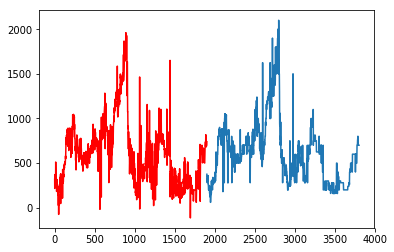

In [12]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [14]:
X = pd.read_csv('azd.csv')
X = X.iloc[:, 8]
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
maxPrice = list()
# Corrected predictions for maxPrice

history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # The dataset has values for approx 292 days a year
    days = 292
    diff = difference(history, days)
    diff = [x for x in diff if str(x) != 'nan']
    # predictions - rolling forecast
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, days)
    predictions.append(yhat)
    minPrice.append(yhat)
    
    obs = test[i+1902]
    history.append(obs)
    print('%d: Predicted=%.3f, Expected=%3.f' % (i,yhat, obs))

mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

for i in range(30):
    diff = difference(history, days)
    diff = [x for x in diff if str(x) != 'nan']
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, days)
    maxPrice.append(yhat)
   

0: Predicted=1448.416, Expected=1400
1: Predicted=1424.087, Expected=1400
2: Predicted=1416.345, Expected=1500
3: Predicted=1550.238, Expected=1500
4: Predicted=1527.089, Expected=1500
5: Predicted=1518.381, Expected=1500
6: Predicted=1512.474, Expected=1400
7: Predicted=1429.318, Expected=1500
8: Predicted=1461.837, Expected=1400
9: Predicted=1434.968, Expected=1400
10: Predicted=1423.723, Expected=1800
11: Predicted=1312.580, Expected=1600
12: Predicted=1172.443, Expected=1600
13: Predicted=1764.945, Expected=1563
14: Predicted=1165.224, Expected=1375
15: Predicted=1355.551, Expected=1200
16: Predicted=1186.055, Expected=1125
17: Predicted=1418.041, Expected=960
18: Predicted=941.088, Expected=960
19: Predicted=1518.685, Expected=1000
20: Predicted=752.987, Expected=1100
21: Predicted=910.624, Expected=1100
22: Predicted=972.235, Expected=1000
23: Predicted=836.119, Expected=1100
24: Predicted=897.605, Expected=1400
25: Predicted=1123.889, Expected=900
26: Predicted=933.117, Expected

220: Predicted=2059.930, Expected=2200
221: Predicted=2119.437, Expected=2250
222: Predicted=2201.956, Expected=2250
223: Predicted=2213.669, Expected=2000
224: Predicted=2068.532, Expected=2125
225: Predicted=2060.246, Expected=2200
226: Predicted=2112.107, Expected=2125
227: Predicted=2150.251, Expected=2125
228: Predicted=2139.386, Expected=2250
229: Predicted=2183.072, Expected=2250
230: Predicted=2343.653, Expected=2400
231: Predicted=2361.763, Expected=2350
232: Predicted=2354.273, Expected=2400
233: Predicted=2332.211, Expected=2300
234: Predicted=2357.662, Expected=2125
235: Predicted=2269.446, Expected=1500
236: Predicted=1942.861, Expected=2250
237: Predicted=2140.297, Expected=2400
238: Predicted=2229.306, Expected=1600
239: Predicted=1954.220, Expected=2224
240: Predicted=2005.819, Expected=2500
241: Predicted=2144.998, Expected=2400
242: Predicted=2217.750, Expected=2300
243: Predicted=2294.549, Expected=1560
244: Predicted=2146.019, Expected=2500
245: Predicted=2258.610, 

435: Predicted=943.650, Expected=950
436: Predicted=968.557, Expected=960
437: Predicted=965.136, Expected=960
438: Predicted=963.712, Expected=900
439: Predicted=939.754, Expected=900
440: Predicted=928.730, Expected=900
441: Predicted=920.762, Expected=920
442: Predicted=952.648, Expected=1000
443: Predicted=971.024, Expected=1050
444: Predicted=998.170, Expected=1100
445: Predicted=1031.657, Expected=1060
446: Predicted=1005.311, Expected=1100
447: Predicted=1058.932, Expected=1100
448: Predicted=1078.228, Expected=1150
449: Predicted=1102.353, Expected=1150
450: Predicted=1165.587, Expected=1050
451: Predicted=1117.749, Expected=1050
452: Predicted=1098.948, Expected=1100
453: Predicted=1104.503, Expected=1000
454: Predicted=1065.005, Expected=1100
455: Predicted=1085.230, Expected=1140
456: Predicted=1104.627, Expected=1150
457: Predicted=1118.258, Expected=1150
458: Predicted=1127.056, Expected=1120
459: Predicted=1121.940, Expected=1100
460: Predicted=1113.752, Expected=1160
461

646: Predicted=1445.905, Expected=1400
647: Predicted=1425.562, Expected=1400
648: Predicted=1287.858, Expected=1450
649: Predicted=1429.731, Expected=1430
650: Predicted=1422.583, Expected=1450
651: Predicted=1432.292, Expected=1450
652: Predicted=1437.629, Expected=1300
653: Predicted=1435.310, Expected=1300
654: Predicted=1340.910, Expected=1220
655: Predicted=1302.290, Expected=3000
656: Predicted=1940.499, Expected=1400
657: Predicted=1666.348, Expected=1400
658: Predicted=1584.799, Expected=1400
659: Predicted=1529.668, Expected=1360
660: Predicted=1476.552, Expected=1200
661: Predicted=1383.278, Expected=1200
662: Predicted=1328.786, Expected=1200
663: Predicted=1290.406, Expected=1200
664: Predicted=1263.423, Expected=1200
665: Predicted=1244.484, Expected=1200
666: Predicted=1231.202, Expected=1200
667: Predicted=1321.890, Expected=1080
668: Predicted=1234.410, Expected=1080
669: Predicted=1138.186, Expected=1050
670: Predicted=1113.122, Expected=1050
671: Predicted=1144.180, 

857: Predicted=3197.720, Expected=3500
858: Predicted=3342.625, Expected=3500
859: Predicted=3661.105, Expected=3400
860: Predicted=3612.095, Expected=3400
861: Predicted=3582.934, Expected=3400
862: Predicted=3557.924, Expected=3400
863: Predicted=3536.404, Expected=3500
864: Predicted=3784.783, Expected=3800
865: Predicted=3388.517, Expected=4000
866: Predicted=3441.617, Expected=3500
867: Predicted=2834.604, Expected=4000
868: Predicted=4330.233, Expected=3800
869: Predicted=4208.697, Expected=3400
870: Predicted=4084.276, Expected=2900
871: Predicted=2604.662, Expected=2850
872: Predicted=4082.925, Expected=3500
873: Predicted=2577.557, Expected=2850
874: Predicted=3040.703, Expected=3300
875: Predicted=3202.595, Expected=3000
876: Predicted=3285.317, Expected=3000
877: Predicted=3492.401, Expected=3100
878: Predicted=3684.030, Expected=3000
879: Predicted=3703.718, Expected=3500
880: Predicted=4214.184, Expected=3500
881: Predicted=3572.677, Expected=3500
882: Predicted=3581.117, 

1071: Predicted=1481.803, Expected=1760
1072: Predicted=1776.708, Expected=1760
1073: Predicted=1764.796, Expected=1760
1074: Predicted=1714.093, Expected=1813
1075: Predicted=1832.479, Expected=1813
1076: Predicted=1825.844, Expected=1900
1077: Predicted=1989.995, Expected=7600
1078: Predicted=3150.510, Expected=1880
1079: Predicted=2758.278, Expected=1800
1080: Predicted=2477.383, Expected=1900
1081: Predicted=2347.414, Expected=2000
1082: Predicted=2289.712, Expected=1813
1083: Predicted=3527.394, Expected=1813
1084: Predicted=1986.286, Expected=1813
1085: Predicted=2006.819, Expected=1920
1086: Predicted=2061.392, Expected=1900
1087: Predicted=1822.394, Expected=1875
1088: Predicted=2061.745, Expected=1800
1089: Predicted=20268.591, Expected=1900
1090: Predicted=-1683.135, Expected=1750
1091: Predicted=-721.071, Expected=1800
1092: Predicted=-66.881, Expected=1850
1093: Predicted=477.760, Expected=1625
1094: Predicted=642.726, Expected=1625
1095: Predicted=646.693, Expected=1750
10

1280: Predicted=1080.615, Expected=1200
1281: Predicted=1095.524, Expected=1160
1282: Predicted=1122.235, Expected=1160
1283: Predicted=1126.248, Expected=1160
1284: Predicted=1120.260, Expected=1220
1285: Predicted=1133.784, Expected=1250
1286: Predicted=1138.313, Expected=1250
1287: Predicted=1141.832, Expected=1250
1288: Predicted=1154.935, Expected=1300
1289: Predicted=1163.382, Expected=1300
1290: Predicted=1149.881, Expected=1300
1291: Predicted=1168.468, Expected=1440
1292: Predicted=1304.142, Expected=1440
1293: Predicted=1217.976, Expected=1500
1294: Predicted=1205.427, Expected=1500
1295: Predicted=1291.818, Expected=1500
1296: Predicted=1215.555, Expected=1480
1297: Predicted=1249.132, Expected=2000
1298: Predicted=1351.589, Expected=1700
1299: Predicted=1336.626, Expected=1700
1300: Predicted=1331.819, Expected=1560
1301: Predicted=1307.408, Expected=1600
1302: Predicted=1345.085, Expected=1600
1303: Predicted=1386.121, Expected=1760
1304: Predicted=1455.192, Expected=1760


1487: Predicted=462.887, Expected=1600
1488: Predicted=625.680, Expected=800
1489: Predicted=1781.108, Expected=800
1490: Predicted=428.905, Expected=800
1491: Predicted=552.992, Expected=800
1492: Predicted=583.669, Expected=800
1493: Predicted=611.506, Expected=800
1494: Predicted=685.782, Expected=1450
1495: Predicted=897.207, Expected=800
1496: Predicted=518.692, Expected=700
1497: Predicted=597.461, Expected=700
1498: Predicted=609.673, Expected=800
1499: Predicted=636.405, Expected=800
1500: Predicted=657.580, Expected=900
1501: Predicted=741.069, Expected=900
1502: Predicted=660.622, Expected=800
1503: Predicted=668.693, Expected=800
1504: Predicted=685.930, Expected=800
1505: Predicted=780.724, Expected=800
1506: Predicted=781.563, Expected=800
1507: Predicted=713.953, Expected=800
1508: Predicted=716.553, Expected=800
1509: Predicted=687.570, Expected=800
1510: Predicted=702.963, Expected=800
1511: Predicted=715.535, Expected=800
1512: Predicted=686.480, Expected=800
1513: Pre

1699: Predicted=1520.718, Expected=1600
1700: Predicted=1531.276, Expected=1600
1701: Predicted=1540.429, Expected=1700
1702: Predicted=1363.837, Expected=1400
1703: Predicted=1366.502, Expected=1500
1704: Predicted=1386.442, Expected=1500
1705: Predicted=1401.576, Expected=1550
1706: Predicted=1422.438, Expected=1400
1707: Predicted=1416.221, Expected=1400
1708: Predicted=1214.058, Expected=1400
1709: Predicted=1243.142, Expected=1400
1710: Predicted=1264.059, Expected=1400
1711: Predicted=1282.193, Expected=1350
1712: Predicted=1290.166, Expected=1300
1713: Predicted=1290.405, Expected=1300
1714: Predicted=1291.685, Expected=1300
1715: Predicted=1292.794, Expected=1300
1716: Predicted=1293.755, Expected=1300
1717: Predicted=1294.588, Expected=1300
1718: Predicted=1295.310, Expected=1300
1719: Predicted=1295.935, Expected=1300
1720: Predicted=1296.477, Expected=1300
1721: Predicted=1296.947, Expected=1300
1722: Predicted=1497.354, Expected=1300
1723: Predicted=1466.749, Expected=1240


In [15]:
residuals_max = [test[i+1902]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
residuals.describe()

0
count  1903.000000
mean      0.515203
std     118.138674
min   -1064.574396
25%     -43.440850
50%      -0.762725
75%      41.360134
max    1104.150521

In [16]:
X = pd.read_csv('azd.csv')
X = X.iloc[:, 9]
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
modalPrice = list()
# Corrected predictions for modalPrice

history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # The dataset has values for approx 292 days a year
    days = 292
    diff = difference(history, days)
    diff = [x for x in diff if str(x) != 'nan']
    # predictions - rolling forecast
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, days)
    predictions.append(yhat)
    minPrice.append(yhat)
    
    obs = test[i+1902]
    history.append(obs)
    print('%d: Predicted=%.3f, Expected=%3.f' % (i,yhat, obs))

mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

for i in range(30):
    diff = difference(history, days)
    diff = [x for x in diff if str(x) != 'nan']
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, days)
    modalPrice.append(yhat)
   

0: Predicted=926.159, Expected=853
1: Predicted=940.498, Expected=864
2: Predicted=513.299, Expected=876
3: Predicted=1078.015, Expected=876
4: Predicted=979.272, Expected=868
5: Predicted=811.763, Expected=861
6: Predicted=830.254, Expected=866
7: Predicted=842.279, Expected=874
8: Predicted=713.181, Expected=881
9: Predicted=816.374, Expected=881
10: Predicted=821.869, Expected=1051
11: Predicted=924.563, Expected=970
12: Predicted=843.488, Expected=1016
13: Predicted=976.386, Expected=979
14: Predicted=951.319, Expected=861
15: Predicted=834.664, Expected=743
16: Predicted=799.700, Expected=800
17: Predicted=859.356, Expected=630
18: Predicted=689.066, Expected=645
19: Predicted=667.177, Expected=633
20: Predicted=663.630, Expected=660
21: Predicted=665.342, Expected=715
22: Predicted=685.231, Expected=680
23: Predicted=671.513, Expected=730
24: Predicted=599.245, Expected=844
25: Predicted=626.574, Expected=568
26: Predicted=643.961, Expected=566
27: Predicted=597.187, Expected=534

221: Predicted=1338.166, Expected=1485
222: Predicted=1433.816, Expected=1472
223: Predicted=1417.151, Expected=1388
224: Predicted=1377.671, Expected=1391
225: Predicted=1372.490, Expected=1462
226: Predicted=1397.060, Expected=1391
227: Predicted=1400.427, Expected=1387
228: Predicted=1397.837, Expected=1409
229: Predicted=1400.131, Expected=1409
230: Predicted=1426.961, Expected=1498
231: Predicted=1453.289, Expected=1496
232: Predicted=1462.175, Expected=1498
233: Predicted=1466.812, Expected=1459
234: Predicted=1467.870, Expected=1378
235: Predicted=1430.617, Expected=1273
236: Predicted=1368.595, Expected=1454
237: Predicted=1419.939, Expected=1548
238: Predicted=1459.938, Expected=1265
239: Predicted=1458.703, Expected=1468
240: Predicted=1427.748, Expected=1477
241: Predicted=1443.925, Expected=1463
242: Predicted=1457.127, Expected=1400
243: Predicted=1432.928, Expected=1255
244: Predicted=1416.543, Expected=1624
245: Predicted=1460.885, Expected=1481
246: Predicted=1479.975, 

437: Predicted=835.833, Expected=778
438: Predicted=800.404, Expected=760
439: Predicted=785.972, Expected=764
440: Predicted=784.915, Expected=762
441: Predicted=786.051, Expected=764
442: Predicted=792.419, Expected=818
443: Predicted=817.176, Expected=828
444: Predicted=829.721, Expected=848
445: Predicted=838.817, Expected=827
446: Predicted=820.782, Expected=822
447: Predicted=847.945, Expected=827
448: Predicted=840.821, Expected=875
449: Predicted=859.597, Expected=905
450: Predicted=892.877, Expected=842
451: Predicted=864.563, Expected=842
452: Predicted=853.110, Expected=842
453: Predicted=853.849, Expected=842
454: Predicted=848.314, Expected=876
455: Predicted=859.037, Expected=900
456: Predicted=878.006, Expected=881
457: Predicted=890.939, Expected=881
458: Predicted=823.482, Expected=867
459: Predicted=890.003, Expected=867
460: Predicted=866.982, Expected=894
461: Predicted=874.764, Expected=906
462: Predicted=876.050, Expected=886
463: Predicted=875.404, Expected=903
4

651: Predicted=1137.330, Expected=1175
652: Predicted=1163.852, Expected=1113
653: Predicted=1141.598, Expected=1118
654: Predicted=1135.388, Expected=1045
655: Predicted=1102.491, Expected=2063
656: Predicted=1467.180, Expected=1090
657: Predicted=1273.138, Expected=1090
658: Predicted=1209.772, Expected=1090
659: Predicted=1169.775, Expected=1080
660: Predicted=1151.182, Expected=938
661: Predicted=1077.056, Expected=968
662: Predicted=1048.987, Expected=943
663: Predicted=1002.553, Expected=890
664: Predicted=983.872, Expected=890
665: Predicted=955.506, Expected=910
666: Predicted=944.360, Expected=910
667: Predicted=1004.543, Expected=868
668: Predicted=955.192, Expected=868
669: Predicted=887.212, Expected=830
670: Predicted=864.254, Expected=803
671: Predicted=894.838, Expected=803
672: Predicted=863.891, Expected=843
673: Predicted=838.516, Expected=857
674: Predicted=827.192, Expected=830
675: Predicted=827.362, Expected=838
676: Predicted=837.142, Expected=1056
677: Predicted

864: Predicted=2902.639, Expected=2514
865: Predicted=2347.767, Expected=2550
866: Predicted=2320.953, Expected=2550
867: Predicted=2395.468, Expected=2765
868: Predicted=2722.525, Expected=2619
869: Predicted=2663.611, Expected=2446
870: Predicted=2570.937, Expected=2312
871: Predicted=2188.011, Expected=2305
872: Predicted=2604.171, Expected=2388
873: Predicted=2163.034, Expected=2305
874: Predicted=2370.804, Expected=2424
875: Predicted=2385.010, Expected=2345
876: Predicted=2368.022, Expected=2370
877: Predicted=2482.667, Expected=2431
878: Predicted=2568.150, Expected=2425
879: Predicted=2540.575, Expected=2460
880: Predicted=2724.881, Expected=2497
881: Predicted=2527.977, Expected=2446
882: Predicted=2511.612, Expected=2343
883: Predicted=2456.317, Expected=2343
884: Predicted=2425.115, Expected=2533
885: Predicted=2471.400, Expected=2400
886: Predicted=2424.179, Expected=2683
887: Predicted=2549.110, Expected=2675
888: Predicted=2580.405, Expected=2650
889: Predicted=2623.188, 

1080: Predicted=1427.735, Expected=1017
1081: Predicted=1329.039, Expected=989
1082: Predicted=1213.786, Expected=946
1083: Predicted=1936.393, Expected=967
1084: Predicted=796.447, Expected=967
1085: Predicted=868.322, Expected=1034
1086: Predicted=944.324, Expected=1029
1087: Predicted=963.661, Expected=964
1088: Predicted=967.108, Expected=890
1089: Predicted=928.147, Expected=1012
1090: Predicted=964.745, Expected=967
1091: Predicted=944.750, Expected=999
1092: Predicted=945.055, Expected=1022
1093: Predicted=1038.920, Expected=933
1094: Predicted=989.520, Expected=855
1095: Predicted=899.987, Expected=861
1096: Predicted=949.422, Expected=853
1097: Predicted=932.564, Expected=939
1098: Predicted=921.631, Expected=665
1099: Predicted=842.155, Expected=936
1100: Predicted=929.855, Expected=936
1101: Predicted=876.376, Expected=836
1102: Predicted=860.905, Expected=968
1103: Predicted=971.691, Expected=973
1104: Predicted=991.140, Expected=1286
1105: Predicted=1092.261, Expected=981


1293: Predicted=967.822, Expected=1092
1294: Predicted=957.180, Expected=1092
1295: Predicted=1048.767, Expected=1090
1296: Predicted=964.948, Expected=1128
1297: Predicted=1019.704, Expected=1274
1298: Predicted=1111.496, Expected=1244
1299: Predicted=1159.552, Expected=1243
1300: Predicted=1150.415, Expected=1283
1301: Predicted=1118.991, Expected=1283
1302: Predicted=1170.721, Expected=1331
1303: Predicted=1221.786, Expected=1338
1304: Predicted=1287.496, Expected=1322
1305: Predicted=1280.313, Expected=1322
1306: Predicted=1293.196, Expected=1322
1307: Predicted=1319.466, Expected=1272
1308: Predicted=1301.471, Expected=1268
1309: Predicted=1325.620, Expected=1268
1310: Predicted=1306.924, Expected=1268
1311: Predicted=1293.782, Expected=1268
1312: Predicted=1286.532, Expected=1299
1313: Predicted=1288.107, Expected=1299
1314: Predicted=1279.483, Expected=1418
1315: Predicted=1313.607, Expected=1406
1316: Predicted=1356.189, Expected=1413
1317: Predicted=1377.872, Expected=1423
131

1501: Predicted=531.844, Expected=546
1502: Predicted=514.595, Expected=536
1503: Predicted=538.083, Expected=532
1504: Predicted=527.296, Expected=536
1505: Predicted=550.345, Expected=534
1506: Predicted=541.648, Expected=534
1507: Predicted=541.674, Expected=534
1508: Predicted=522.432, Expected=526
1509: Predicted=518.894, Expected=492
1510: Predicted=510.896, Expected=492
1511: Predicted=505.581, Expected=536
1512: Predicted=466.341, Expected=530
1513: Predicted=470.360, Expected=524
1514: Predicted=485.820, Expected=522
1515: Predicted=721.793, Expected=522
1516: Predicted=436.384, Expected=522
1517: Predicted=471.566, Expected=514
1518: Predicted=471.967, Expected=478
1519: Predicted=475.348, Expected=470
1520: Predicted=473.287, Expected=476
1521: Predicted=479.354, Expected=468
1522: Predicted=475.518, Expected=466
1523: Predicted=484.764, Expected=456
1524: Predicted=465.613, Expected=387
1525: Predicted=440.659, Expected=373
1526: Predicted=461.090, Expected=348
1527: Predic

1717: Predicted=650.317, Expected=654
1718: Predicted=659.063, Expected=665
1719: Predicted=660.947, Expected=663
1720: Predicted=661.429, Expected=670
1721: Predicted=664.210, Expected=627
1722: Predicted=684.504, Expected=623
1723: Predicted=651.206, Expected=608
1724: Predicted=642.900, Expected=593
1725: Predicted=577.792, Expected=553
1726: Predicted=512.259, Expected=557
1727: Predicted=528.110, Expected=557
1728: Predicted=536.305, Expected=557
1729: Predicted=571.174, Expected=556
1730: Predicted=629.366, Expected=561
1731: Predicted=610.016, Expected=562
1732: Predicted=565.297, Expected=533
1733: Predicted=516.237, Expected=533
1734: Predicted=502.001, Expected=484
1735: Predicted=485.489, Expected=477
1736: Predicted=279.232, Expected=477
1737: Predicted=383.565, Expected=477
1738: Predicted=351.162, Expected=477
1739: Predicted=386.750, Expected=471
1740: Predicted=432.525, Expected=471
1741: Predicted=423.346, Expected=473
1742: Predicted=300.515, Expected=473
1743: Predic

In [17]:
residuals_max = [test[i+1902]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
residuals.describe()

0
count  1903.000000
mean      0.515203
std     118.138674
min   -1064.574396
25%     -43.440850
50%      -0.762725
75%      41.360134
max    1104.150521

In [18]:
from datetime import datetime, timedelta, date
var = list()
temp1 = datetime.strptime('2018-09-01', '%Y-%m-%d').date()
for i in range(30):
    var.append(temp1.strftime('%Y-%m-%d'))
    temp1 = temp1 + timedelta(1)

In [25]:
import csv
v = open('result.csv', 'w')
w = csv.writer(v)
w.writerow(['priceDate', 'minPrice', 'maxPrice', 'modalPrice'])
for i in range(len(var)):
    w.writerow([var[i], minPrice[i][0], maxPrice[i][0], modalPrice[i][0]])

data = pd.read_csv('result.csv')
data.head()

priceDate     minPrice     maxPrice   modalPrice
0  2018-09-01  1448.416337  2418.501852  1437.147295
1  2018-09-02  1424.087143  2418.501852  1437.147295
2  2018-09-03  1416.344732  2418.501852  1437.147295
3  2018-09-04  1550.238325  2418.501852  1437.147295
4  2018-09-05  1527.088803  2418.501852  1437.147295

In [26]:
data

priceDate     minPrice     maxPrice   modalPrice
0   2018-09-01  1448.416337  2418.501852  1437.147295
1   2018-09-02  1424.087143  2418.501852  1437.147295
2   2018-09-03  1416.344732  2418.501852  1437.147295
3   2018-09-04  1550.238325  2418.501852  1437.147295
4   2018-09-05  1527.088803  2418.501852  1437.147295
5   2018-09-06  1518.381462  2418.501852  1437.147295
6   2018-09-07  1512.473775  2418.501852  1437.147295
7   2018-09-08  1429.317565  2418.501852  1437.147295
8   2018-09-09  1461.837084  2418.501852  1437.147295
9   2018-09-10  1434.968188  2418.501852  1437.147295
10  2018-09-11  1423.723143  2418.501852  1437.147295
11  2018-09-12  1312.579612  2418.501852  1437.147295
12  2018-09-13  1172.442771  2418.501852  1437.147295
13  2018-09-14  1764.945197  2418.501852  1437.147295
14  2018-09-15  1165.223770  2418.501852  1437.147295
15  2018-09-16  1355.551427  2418.501852  1437.147295
16  2018-09-17  1186.054597  2418.501852  1437.147295
17  2018-09-18  1418.041439  2418.501852  1437.147295
18  2018-09-19   941.087868  2418.501852  1437.147295
19  2018-09-20  1518.685233  2418.501852  1437.147295
20  2018-09-21   752.986821  2418.501852  1437.147295
21  2018-09-22   910.623905  2418.501852  1437.147295
22  2018-09-23   972.234825  2418.501852  1437.147295
23  2018-09-24   836.119113  2418.501852  1437.147295
24  2018-09-25   897.605005  2418.501852  1437.147295
25  2018-09-26  1123.888937  2418.501852  1437.147295
26  2018-09-27   933.116563  2418.501852  1437.147295
27  2018-09-28   880.200809  2418.501852  1437.147295
28  2018-09-29   891.232576  2418.501852  1437.147295
29  2018-09-30  1072.032291  2418.501852  1437.147295

In [27]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
import numpy

# monkey patch around bug in ARIMA class
def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))

ARIMA.__getnewargs__ = __getnewargs__

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
diff = difference(X, months_in_year)
# fit model
model = ARIMA(diff, order=(0,0,1))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual
bias = 165.904728
# save model
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

/home/vishal/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
